# Problem Set 2

## 1 pp-chain vs CNO cycle [4 points]
We derived the nuclear energy production rates for the pp-chain and the CNO cycle:
\begin{equation}
ϵ_{pp} = 2.38 × 10^4ρ_5X^2T_6^{−2/3}e^{−33.80T_6^{−1/3}} W/kg
\end{equation}

\begin{equation}
ϵ_{CNO} = 8.67 × 10^{25}ρ_5XX_{CNO}T_6^{−2/3}e^{−152.28T_6^{−1/3}}W/kg
\end{equation}
Use values for the typical central density ρ = 100 g/cm−3 and chemical composition X=0.75, XCNO = 0.008 to reproduce the graph on the slide titled “pp-chain vs CNO cycle” in the lecture notes. Full marks will be given if your graph shows the two curves and has exactly the same axis ranges, scales, and physical units.

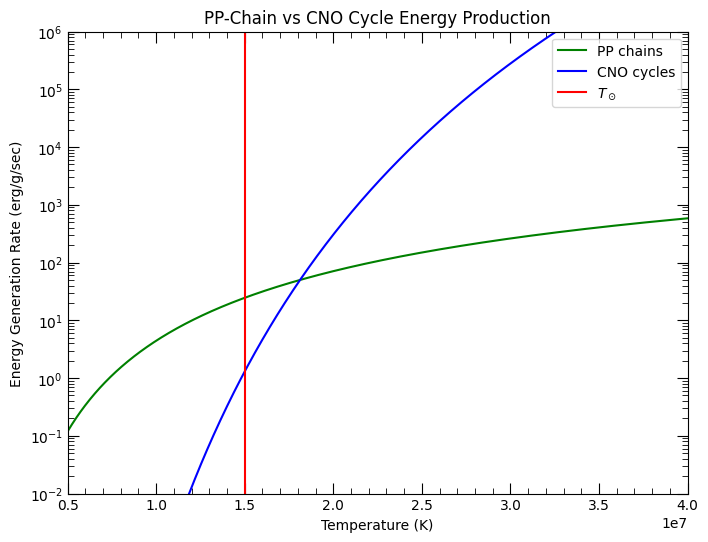

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
rho5 = 100 / 1e5  # Convert to 10^5 kg/m³ units
X = 0.75
X_CNO = 0.008

# Temperature range (in million K, T6 = T / 1e6 K)
T6 = np.linspace(5, 40, 1000)  # From 5 to 40 million K

# Compute energy generation rates using the given formulas
epsilon_pp = 2.38e4 * rho5 * X**2 * T6**(-2/3) * np.exp(-33.80 * T6**(-1/3))
epsilon_CNO = 8.67e25 * rho5 * X * X_CNO * T6**(-2/3) * np.exp(-152.28 * T6**(-1/3))

# Convert energy rates from W/kg to erg/g/s (1 W/kg = 10^7 erg/g/s)
epsilon_pp *= 1e7
epsilon_CNO *= 1e7

# Plot the graph
plt.figure(figsize=(8, 6))
plt.loglog(T6 * 1e6, epsilon_pp, label="PP chains", color="green")  # Convert T6 back to K
plt.loglog(T6 * 1e6, epsilon_CNO, label="CNO cycles", color="blue")

# Solar core temperature (approx. 1.5 x 10^7 K)
T_sun = 1.5e7
plt.axvline(T_sun, color="red", linestyle="-", label="$T_\\odot$")

# Labels and title
plt.xlabel("Temperature (K)")
plt.ylabel("Energy Generation Rate (erg/g/sec)")
plt.title("PP-Chain vs CNO Cycle Energy Production")
plt.legend()
plt.ylim(1e-2, 1e6)
plt.xlim(0.5e7, 4e7)

# Keep x scale linear for better readability
plt.xscale("linear")

# Add more markings to x-axis (only lines and not the numbers)
plt.minorticks_on()

# Add markers to the right side of the plot and remove the numbers
plt.tick_params(axis="both", which="both", direction="in", top=True, right=True)
plt.tick_params(axis="both", which="major", length=8)  # Increase major tick length
plt.tick_params(axis="both", which="minor", length=4)  # Keep minor tick length smaller
# Show plot
plt.show()

## 2 White dwarf or neutron star [14 points]
In this problem we will use the concept of polytropes and the Lane-Emden equation to estimate the Chandrasekhar mass, the minimum mass a star must have so it does not form a white dwarf but instead continues to collapse, blows oﬀ its gaseous envelope in a supernova explosion, and becomes a neutron star. Finding that critical mass is one of the greatest accomplishments in stellar astrophysics and one of the main motivations for Prof. Subrahmanyan Chandrasekhar being awarded the Nobel Prize in Physics in 1983 for *“...theoretical studies of the physical processes of importance to the structure and evolution of the stars”*.
The name polytrope comes from the assumption that the stellar pressure is related to the density by a power law:
$$
P = K \ \rho^{(n+1)/n}
$$
where $K$ is a constant determined by the specific equation of state, $\rho$ the density, $P$ the pressure, and $n$ the so-called polytropic index. We will derive the famous second-order diﬀerential equation known as the Lane-Emden equation:
$$
\frac{1}{\xi^2} \frac{d}{d\xi}\left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$$
Here both $\xi$ and $\theta$ are dimensionless variables, which are related to radius and density, respectively.

1. (2 points) Use the stellar structure equations for conservation of mass and hydrostatic equilibrium to derive the equation:
$$
\frac{1}{r^2} \frac{d}{dr} \left( \frac{r^2}{\rho} \frac{dP}{dr} \right) = -4 \pi G \rho
$$
Note that $P$, $m$ and $ρ$ are all functions of the radius $r$.

2. (4 points) Use Eq. 3 together with Eq. 1 and substitute $\rho= \rho_c \theta^n$ and $r= \alpha \xi$. Here $\alpha$ and $\rho_c$ are constants. Derive the expression for $\alpha^2$ to obtain Eq. 2?

3. (3 points) Derive an expression for the total mass of the star $ M_* $ containing $ \alpha $, $ \xi $, and $ \theta $ using Eq. (2). Note that the surface of the star occurs at the point $ \xi = \xi_1 $, where $ \theta(\xi_1) = 0 $ is the first zero of $ \theta $.

4. (3 points) Write a code in a programming language of your choice to integrate the dimensionless Lane-Emden equation from $ \xi = 0 $ to $ \xi = \xi_1 $ i.e. until the stellar surface where $ \theta = 0 $. The boundary conditions are $ \theta(\xi = 0) = 1 $ and $ \left[ \frac{d\theta}{d\xi} \right]_{\xi=0} = 0 $.

Verify that your program is working properly by solving for polytropes with $ n = 0 $ and $ n = 1 $ for which the analytical solutions are:

\begin{equation}
\theta(\xi) = 1 - \frac{\xi^2}{6}, \quad (n = 0)
\end{equation}

\begin{equation}
\theta(\xi) = \frac{\sin(\xi)}{\xi}, \quad (n = 1)
\end{equation}

Make plots of your numerical solution $ \theta(\xi) $ together with the analytical solutions for $ n = 0 $ and $ n = 1 $. Label the axes and identify the different curves. Provide a copy of your computer code in your submission of the assignment together with brief instructions how to use it.


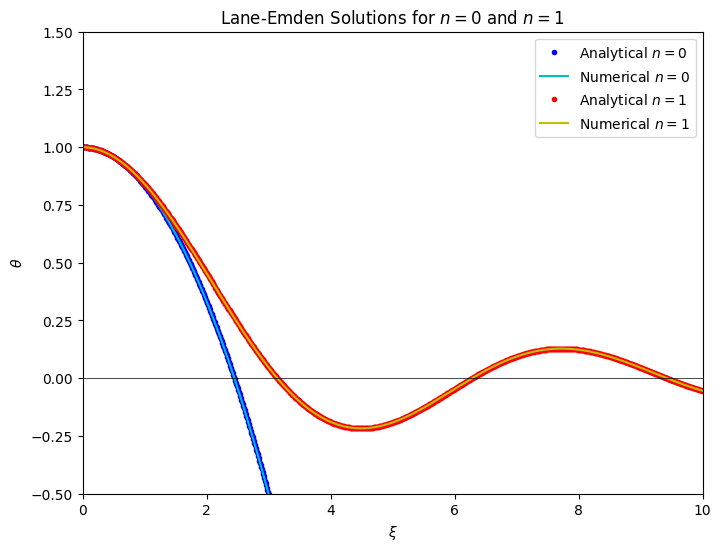

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lane-Emden equation as a system of first-order ODEs
def lane_emden(xi, y, n):
    theta, dtheta_dxi = y
    if xi == 0:
        return [dtheta_dxi, 0]  # Avoid division by zero
    return [dtheta_dxi, - (2/xi) * dtheta_dxi - theta**n]

# Solve Lane-Emden equation numerically
def solve_lane_emden(n, xi_max=10, xi_points=1000):
    xi_vals = np.linspace(1e-6, xi_max, xi_points)  # Start from small value to avoid singularity
    y0 = [1, 0]  # Initial conditions: theta(0) = 1, dtheta/dxi (0) = 0
    sol = solve_ivp(lane_emden, [xi_vals[0], xi_vals[-1]], y0, t_eval=xi_vals, args=(n,), method='RK45')
    return sol.t, sol.y[0]  # Return xi and theta values

# Analytical solutions
def analytical_n0(xi):
    return 1 - xi**2 / 6

def analytical_n1(xi):
    return np.sinc(xi / np.pi)  # sin(x)/x equivalent

# Compute solutions
xi_range = np.linspace(0, 10, 1000)
theta_n0_analytical = analytical_n0(xi_range)
theta_n1_analytical = analytical_n1(xi_range)
xi_numerical, theta_n0_numerical = solve_lane_emden(n=0)
xi_numerical, theta_n1_numerical = solve_lane_emden(n=1)

# Plot results
plt.figure(figsize=(8,6))
plt.plot(xi_range, theta_n0_analytical, 'b.', label='Analytical $n=0$')
plt.plot(xi_numerical, theta_n0_numerical, 'c-', label='Numerical $n=0$')
plt.plot(xi_range, theta_n1_analytical, 'r.', label='Analytical $n=1$')
plt.plot(xi_numerical, theta_n1_numerical, 'y-', label='Numerical $n=1$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\theta$')
plt.xlim(0,10)
plt.ylim(-0.5, 1.5)
plt.title('Lane-Emden Solutions for $n=0$ and $n=1$')
plt.legend()
plt.show()


5. (3 points) We are now in a position to evaluate the Chandrasekhar mass. For a relativistic, degenerate electron gas, the equation of state is given by:

$$
P = \left( \frac{3}{\pi} \right)^{1/3} \frac{hc}{8}\left(\frac{\rho}{\mu_e m_p}\right)^{4/3}.
$$

Here, $ \mu_e $ is the mean molecular weight, which can be assumed to be $ \mu_e = 2 $ for a white dwarf, $ h $ is Planck’s constant, $ c $ is the speed of light, and $ m_p $ is the proton mass. Eq. 6 is clearly a polytrope
with the polytropic index $n = 3$. Use your program to numerically evaluate $\xi_1$ and $\left. \frac{d\theta}{d\xi} \right|_{\xi=\xi_1}$ and compute $M_\star$, the Chandrasekhar mass.

First zero of theta for n=3: 6.9169
dtheta/dxi at first zero: -0.0422


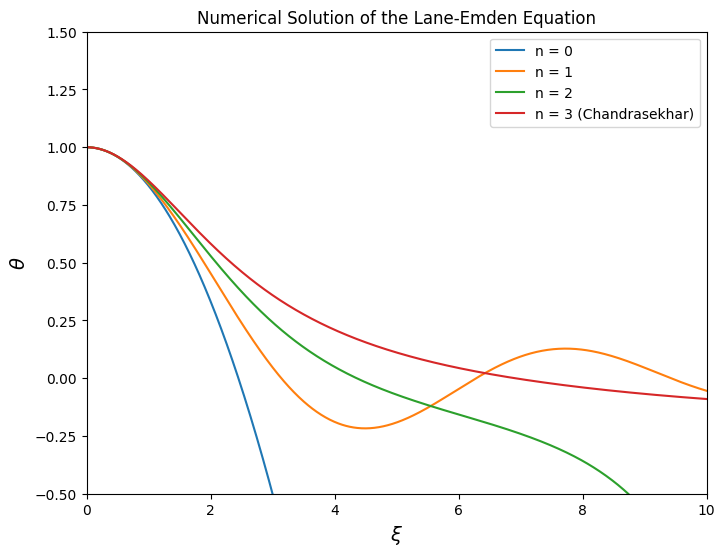

Chandrasekhar Mass: 1.4359 M_sun


In [3]:
import numpy as np
from scipy.constants import h, c, G, m_p 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def lane_emden_eq(xi, y, n):
    theta, dtheta_dxi = y
    if xi == 0:
        return [dtheta_dxi, 0] # Avoid division by zero
    return [dtheta_dxi, - (2/xi) * dtheta_dxi - theta**n]

def solve_lane_emden(n, xi_max=10, xi_eval=1000):
    xi_vals = np.linspace(1e-6, xi_max, xi_eval)  # Avoid singularity at xi = 0
    y0 = [1, 0]  # Initial conditions: theta(0) = 1, dtheta/dxi(0) = 0
    sol = solve_ivp(lane_emden_eq, [xi_vals[0], xi_vals[-1]], y0, t_eval=xi_vals, args=(n,), method='RK45')
    return sol.t, sol.y[0], sol.y[1]

# Solve for n = 0, n = 1 and n = 2
xi_0, theta_0, _ = solve_lane_emden(0)
xi_1, theta_1, _ = solve_lane_emden(1)
xi_2, theta_2, _ = solve_lane_emden(2)

# Solve for n = 3 to compute Chandrasekhar mass
xi_3, theta_3, dtheta_dxi_3 = solve_lane_emden(3)

# Find first zero of theta for n=3
xi_1_chandra = xi_3[np.where(theta_3 <= 0)[0][0]]
dtheta_dxi_xi1 = dtheta_dxi_3[np.where(theta_3 <= 0)[0][0]]

# Print the first zero of theta for n=3
print(f'First zero of theta for n=3: {xi_1_chandra:.4f}')
# Compute the derivative at the first zero
print(f'dtheta/dxi at first zero: {dtheta_dxi_xi1:.4f}')

# Compute Chandrasekhar mass
mu_e = 2  # Mean molecular weight for white dwarf

# Corrected K expression in SI units
K = ((3/np.pi)**(1/3)) * ((h*c) / (8)) * (1 / (mu_e * m_p))**(4/3)

# Corrected mass expression
M_chandra = (4 * np.pi) * (K / (G* np.pi))**(3/2) * (-xi_1_chandra**2 * dtheta_dxi_xi1) 
M_chandra /= 1.989e30  # Convert to solar mass

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(xi_0, theta_0, label='n = 0')
plt.plot(xi_1, theta_1, label='n = 1')
plt.plot(xi_2, theta_2, label='n = 2')
plt.plot(xi_3, theta_3, label='n = 3 (Chandrasekhar)')
plt.xlabel(r'$\xi$', fontsize=14)
plt.ylabel(r'$\theta$', fontsize=14)
plt.xlim(0,10)
plt.ylim(-0.5,1.5)
plt.title('Numerical Solution of the Lane-Emden Equation')
plt.legend()
plt.show()

print(f'Chandrasekhar Mass: {M_chandra:.4f} M_sun')

## 3 Modules for Experiments in Stellar Astrophysics

For this problem we will use realistic stellar interior models for diﬀerent stellar masses and chemical compositions based on detailed nuclear burning and opacities. These models follow the temporal evolution of the stellar structure from the pre-main sequence towards the end of the stellar life when nuclear burning can no longer be sustained. MESA is one of the most popular and sophisticated stellar evolution codes currently available with a large user community. It has been employed in a variety of astrophysical situations, including normal stars, planets, supernovae, binary stars and stellar pulsations. The code and some of its capabilities are described in Paxton et al. (2011, ApJS, 192, 3:
http://adsabs.harvard.edu/abs/2011ApJS..192....3P). Visit Rich Townsend’s mad star MESA-Web and compute your own stellar evolutionary models for initial masses of M = 0.1, 1.0, 10.0, 100.0 M⊙, each for two diﬀerent metallicities: Z = 0.0001 and Z = 0.01 (8 models in total). The first chemical composition corresponds to a heavy element abundance roughly 1/100th of the Sun and the second one to a slightly sub-solar abundance. For the nuclear reaction network, choose mesa 49. Leave all other options as the default values. Enter your email address and press submit. IMPORTANT: each calculation will take approximately 4hrs but multiple jobs can be submitted in parallel so submit all directly after each other. You will receive an email when each of the models has finished. Download and unzip the data, which will create a folder for each model containing a number of output files. Focus on the file called trimmed history.data, which contains the evolutionary tracks for each stellar model describing how the physical properties of the star vary in time. Refer to MESA-Web Output on the MESA website for a description of the files and output variables.

1. (5 points) Plot a single Hertzsprung-Russell diagram showing the evolutionary tracks of the eight model stars. Use diﬀerent colours and/or line types for the two sets of chemical compositions; include labels for axes. For each stellar model, mark the location at ages 106, 107, 108, 109, 1010 years, if applicable (you can use the model number closest to these ages). Discuss the metallicity dependence of the locations of the zero-age main sequence and red giant branch (if present). Provide physical arguments for this behaviour. Do metal-poor stars (Z = 0.0001) live longer or shorter than
solar metallicity stars (Z = 0.01) of the same mass? Explain why?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_web
# File paths
filenames = [
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data", 
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 5",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 7",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
]

# Inspect available keys in the data
for filename in filenames:
        model_data = mesa_web.read_history(filename)
        print(f"Available keys in {filename}: {model_data.keys()}\n")

# CHeck the mass and metallicity of each model
for filename in filenames:
    model_data = mesa_web.read_history(filename)
    mass = model_data['star_mass']
    print(f"Mass: {mass}")

Available keys in /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data: dict_keys(['version_number', 'compiler', 'build', 'MESA_SDK_version', 'math_backend', 'date', 'burn_min1', 'burn_min2', 'model_number', 'star_age', 'star_mass', 'log_L', 'log_R', 'log_Teff', 'log_center_T', 'log_center_Rho', 'log_center_P', 'center_h1', 'center_he3', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'center_s32', 'center_ar36', 'center_ca40', 'center_ti44', 'center_cr48', 'center_fe52', 'center_fe54', 'center_fe56', 'center_ni56', 'center_degeneracy', 'center_ye', 'center_entropy', 'compactness_parameter', 'dynamic_timescale', 'kh_timescale', 'nuc_timescale', 'pp', 'cno', 'tri_alfa', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lneu', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'si_core_mass', 'fe_core_mass', 'he_core_radius', 'c_core_radius', 'o_core_radius', 'si_core_radius', 'fe_core_

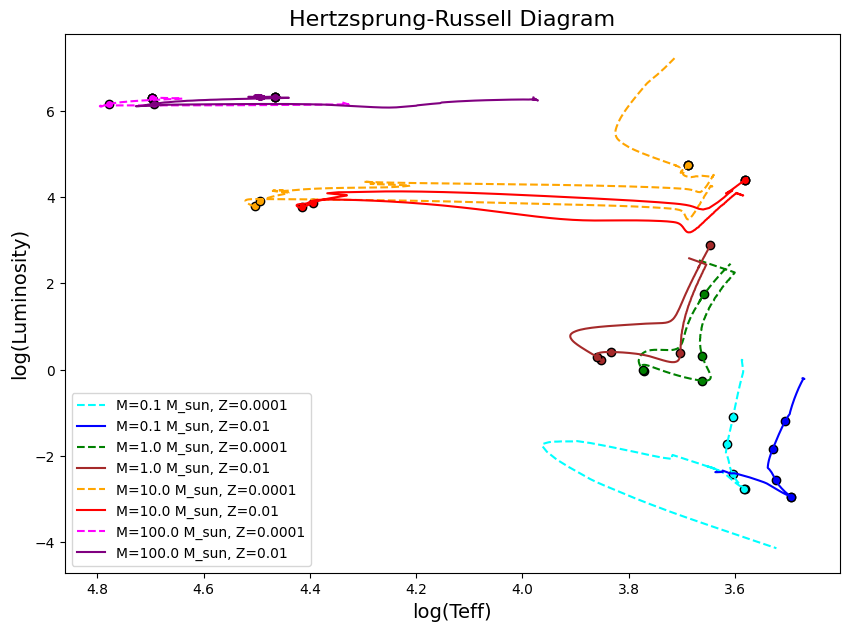

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_web import read_history

def load_mesa_data(filenames):
    """Loads MESA history files and extracts relevant columns."""
    data = {}
    for filename in filenames:
        model_data = mesa_web.read_history(filename)
        data[filename] = {
            'log_Teff': model_data['log_Teff'],
            'log_L': model_data['log_L'],
            'star_age': model_data['star_age'],
        }
    return data

def plot_hr_diagram(data, age_markers):
    """Plots the Hertzsprung-Russell diagram for all models."""
    plt.figure(figsize=(10, 7))

    # Define the models
    models = [
        ("0.1", "0.0001", "cyan", "dashed"),
        ("0.1", "0.01", "blue", "solid"),
        ("1.0", "0.0001", "green", "dashed"),
        ("1.0", "0.01", "brown", "solid"),
        ("10.0", "0.0001", "orange", "dashed"),
        ("10.0", "0.01", "red", "solid"),
        ("100.0", "0.0001", "magenta", "dashed"),
        ("100.0", "0.01", "purple", "solid")
    ]
    
    for (filename, values), (mass, metallicity, color, linestyle) in zip(data.items(), models):
        
        plt.plot(values['log_Teff'], values['log_L'], label=f"M={mass} M_sun, Z={metallicity}",
                 color=color, linestyle=linestyle)
        
        # Mark specific ages
        for age in age_markers:
            idx = (np.abs(values['star_age'] - age)).argmin()
            plt.scatter(values['log_Teff'][idx], values['log_L'][idx], color=color, edgecolor='black')
    
    plt.gca().invert_xaxis()  # Hot stars (high Teff) on the left
    plt.xlabel("log(Teff)", fontsize=14)
    plt.ylabel("log(Luminosity)", fontsize=14)
    plt.title("Hertzsprung-Russell Diagram", fontsize=16)
    plt.legend()
    plt.show()

# File paths
filenames = [
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data", 
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 5",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 7",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
]

# Corresponding masses and metallicities
masses = [0.1, 0.1, 1.0, 1.0, 10.0, 10.0, 100.0, 100.0]
metallicities = [0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01]

# Define ages to mark (in years)
age_markers = [1e6, 1e7, 1e8, 1e9, 1e10]

# Load data and plot
mesa_data = load_mesa_data(filenames)
plot_hr_diagram(mesa_data, age_markers)

2. (3 points) Find the luminosity, eﬀective temperature, radius, and mass when the central H mass fraction (center h1) first falls below 0.60 for each star. Plot the mass-luminosity, mass- temperature and mass-radius for the two sets of metallicities (use log-log scale for the plots).

File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data
Metallicity: 0.0001
Mass: 0.0999 M☉
Luminosity: 0.0040 L☉
Temperature: 4176.10 K
Radius: 0.1212 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2
Metallicity: 0.01
Mass: 0.1000 M☉
Luminosity: 0.0021 L☉
Temperature: 3420.61 K
Radius: 0.1312 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3
Metallicity: 0.0001
Mass: 0.9999 M☉
Luminosity: 1.0452 L☉
Temperature: 5951.43 K
Radius: 0.9630 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4
Metallicity: 0.01
Mass: 0.9999 M☉


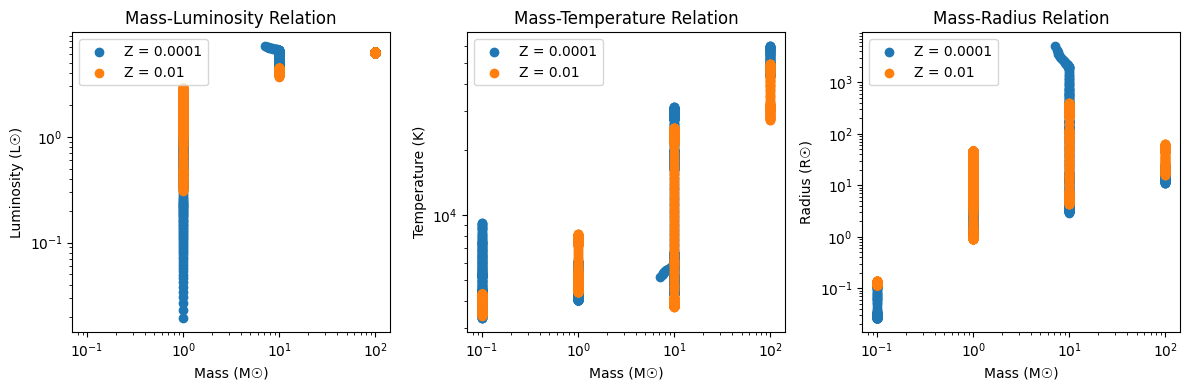

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_web import read_history

def extract_parameters(filenames, metallicities):
    """Extracts L, Teff, R, M for all points where center_h1 < 0.60"""
    extracted_data = []
    all_metallicities = []

    for i, filename in enumerate(filenames):
        model_data = read_history(filename)
        
        # Find all indices where center_h1 < 0.60
        mask = model_data['center_h1'] < 0.60
        if not np.any(mask):
            continue  # Skip if the condition is never met
        
        # Extract parameters for all valid points
        masses = model_data['star_mass'][mask]  # Mass in solar units
        luminosities = model_data['log_L'][mask]  # Luminosity in log scale
        temperatures = 10**model_data['log_Teff'][mask]  # Convert log_Teff to Teff in Kelvin
        radii = 10**model_data['log_R'][mask]  # Convert log_R to radius in solar units

        # Print the first occurrence where center_h1 < 0.60
        first_index = np.where(mask)[0][0]
        print(f"File: {filename}")
        print(f"Metallicity: {metallicities[i]}")
        print(f"Mass: {model_data['star_mass'][first_index]:.4f} M☉")
        print(f"Luminosity: {10**model_data['log_L'][first_index]:.4f} L☉")
        print(f"Temperature: {10**model_data['log_Teff'][first_index]:.2f} K")
        print(f"Radius: {10**model_data['log_R'][first_index]:.4f} R☉")
        print("-" * 50)
        
        # Append data for each valid point
        for mass, luminosity, teff, radius in zip(masses, luminosities, temperatures, radii):
            extracted_data.append((mass, luminosity, teff, radius))
            all_metallicities.append(metallicities[i])  # Add corresponding metallicity for each point

    return np.array(extracted_data), np.array(all_metallicities)


def plot_relations(data, metallicities):
    """Generates log-log plots of Mass vs Luminosity, Temperature, and Radius"""
    masses, luminosities, temperatures, radii = data.T

    plt.figure(figsize=(12, 4))
    
    # Mass-Luminosity
    plt.subplot(1, 3, 1)
    for metallicity in np.unique(metallicities):
        mask = metallicities == metallicity
        plt.scatter(masses[mask], luminosities[mask], label=f"Z = {metallicity}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Mass (M☉)")
    plt.ylabel("Luminosity (L☉)")
    plt.title("Mass-Luminosity Relation")
    plt.legend()
    
    # Mass-Temperature
    plt.subplot(1, 3, 2)
    for metallicity in np.unique(metallicities):
        mask = metallicities == metallicity
        plt.scatter(masses[mask], temperatures[mask], label=f"Z = {metallicity}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Mass (M☉)")
    plt.ylabel("Temperature (K)")
    plt.title("Mass-Temperature Relation")
    plt.legend()
    
    # Mass-Radius
    plt.subplot(1, 3, 3)
    for metallicity in np.unique(metallicities):
        mask = metallicities == metallicity
        plt.scatter(masses[mask], radii[mask], label=f"Z = {metallicity}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Mass (M☉)")
    plt.ylabel("Radius (R☉)")
    plt.title("Mass-Radius Relation")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Define file paths
filenames = [
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data", 
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 5",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 7",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
]

# Corresponding metallicities
metallicities = [0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01]

# Extract data and plot
data, metallicities = extract_parameters(filenames, metallicities)
plot_relations(data, metallicities)

File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data
Metallicity: 0.0001
Mass: 0.0999 M☉
Luminosity: 0.0040 L☉
Temperature: 4176.10 K
Radius: 0.1212 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2
Metallicity: 0.01
Mass: 0.1000 M☉
Luminosity: 0.0021 L☉
Temperature: 3420.61 K
Radius: 0.1312 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3
Metallicity: 0.0001
Mass: 0.9999 M☉
Luminosity: 1.0452 L☉
Temperature: 5951.43 K
Radius: 0.9630 R☉
--------------------------------------------------
File: /Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4
Metallicity: 0.01
Mass: 0.9999 M☉


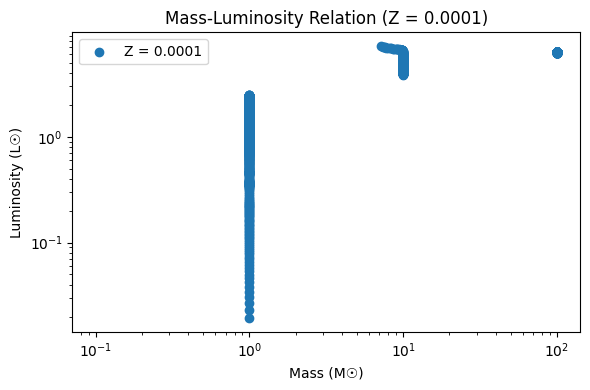

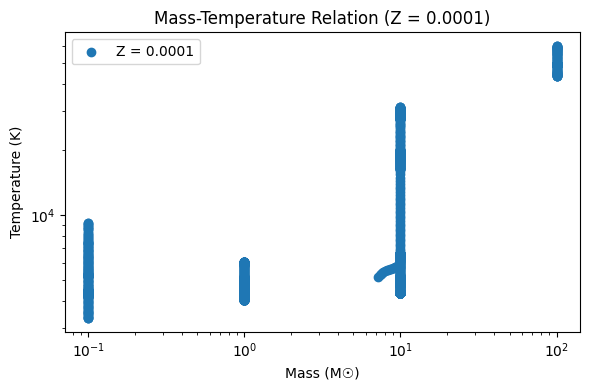

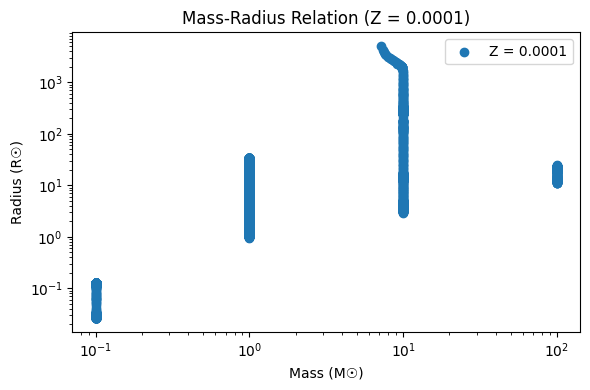

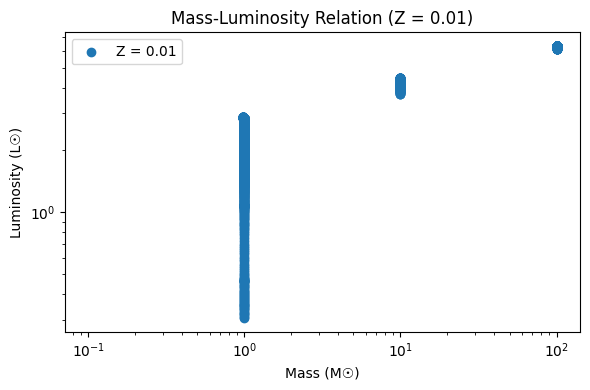

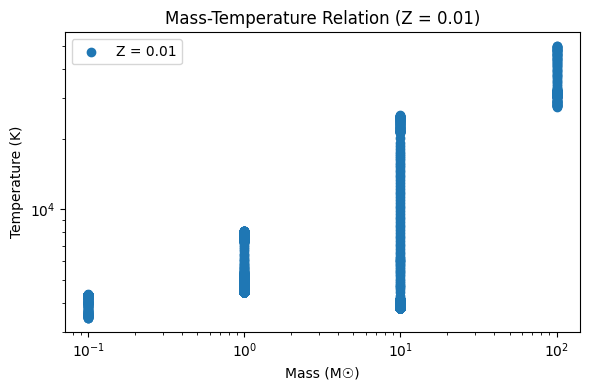

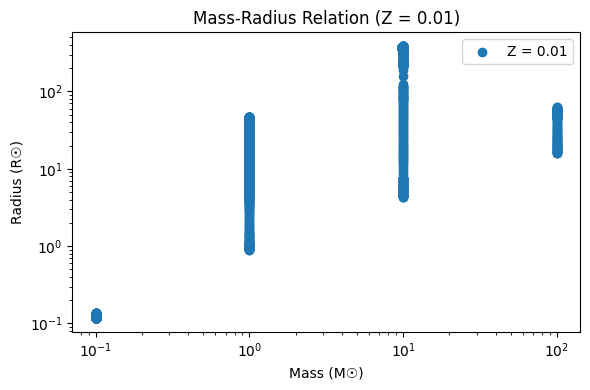

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_web import read_history

def extract_parameters(filenames, metallicities):
    """Extracts L, Teff, R, M for all points where center_h1 < 0.60"""
    extracted_data = []
    all_metallicities = []

    for i, filename in enumerate(filenames):
        model_data = read_history(filename)
        
        # Find all indices where center_h1 < 0.60
        mask = model_data['center_h1'] < 0.60
        if not np.any(mask):
            continue  # Skip if the condition is never met
        
        # Extract parameters for all valid points
        masses = model_data['star_mass'][mask]  # Mass in solar units
        luminosities = model_data['log_L'][mask]  # Luminosity in log scale
        temperatures = 10**model_data['log_Teff'][mask]  # Convert log_Teff to Teff in Kelvin
        radii = 10**model_data['log_R'][mask]  # Convert log_R to radius in solar units
        
        # Print the first occurrence where center_h1 < 0.60
        first_index = np.where(mask)[0][0]
        print(f"File: {filename}")
        print(f"Metallicity: {metallicities[i]}")
        print(f"Mass: {model_data['star_mass'][first_index]:.4f} M☉")
        print(f"Luminosity: {10**model_data['log_L'][first_index]:.4f} L☉")
        print(f"Temperature: {10**model_data['log_Teff'][first_index]:.2f} K")
        print(f"Radius: {10**model_data['log_R'][first_index]:.4f} R☉")
        print("-" * 50)
        
        # Append data for each valid point
        for mass, luminosity, teff, radius in zip(masses, luminosities, temperatures, radii):
            extracted_data.append((mass, luminosity, teff, radius))
            all_metallicities.append(metallicities[i])  # Add corresponding metallicity for each point

    return np.array(extracted_data), np.array(all_metallicities)


def plot_relations(data, metallicities):
    """Generates separate log-log plots for each metallicity"""
    masses, luminosities, temperatures, radii = data.T

    unique_metallicities = np.unique(metallicities)
    for metallicity in unique_metallicities:
        mask = metallicities == metallicity
        
        # Mass-Luminosity
        plt.figure(figsize=(6, 4))
        plt.scatter(masses[mask], luminosities[mask], label=f"Z = {metallicity}")
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Mass (M☉)")
        plt.ylabel("Luminosity (L☉)")
        plt.title(f"Mass-Luminosity Relation (Z = {metallicity})")
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Mass-Temperature
        plt.figure(figsize=(6, 4))
        plt.scatter(masses[mask], temperatures[mask], label=f"Z = {metallicity}")
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Mass (M☉)")
        plt.ylabel("Temperature (K)")
        plt.title(f"Mass-Temperature Relation (Z = {metallicity})")
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # Mass-Radius
        plt.figure(figsize=(6, 4))
        plt.scatter(masses[mask], radii[mask], label=f"Z = {metallicity}")
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel("Mass (M☉)")
        plt.ylabel("Radius (R☉)")
        plt.title(f"Mass-Radius Relation (Z = {metallicity})")
        plt.legend()
        plt.tight_layout()
        plt.show()

# Define file paths
filenames = [
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data", 
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 5",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 7",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
]

# Corresponding metallicities
metallicities = [0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01]

# Extract data and plot
data, metallicities = extract_parameters(filenames, metallicities)
plot_relations(data, metallicities)

3. (5 points) Plot the time evolution of the central density ρc and temperature Tc for the diﬀerent models. Make a single graph, one for ρc and one for temperature Tc. Use the star age interval $10^0−10^{11}$ years on a log10 scale. Mark when H, He, and C-burning (if applicable) become important.
Provide physical arguments for the dependence on mass and metallicity of the conditions in thecentre.

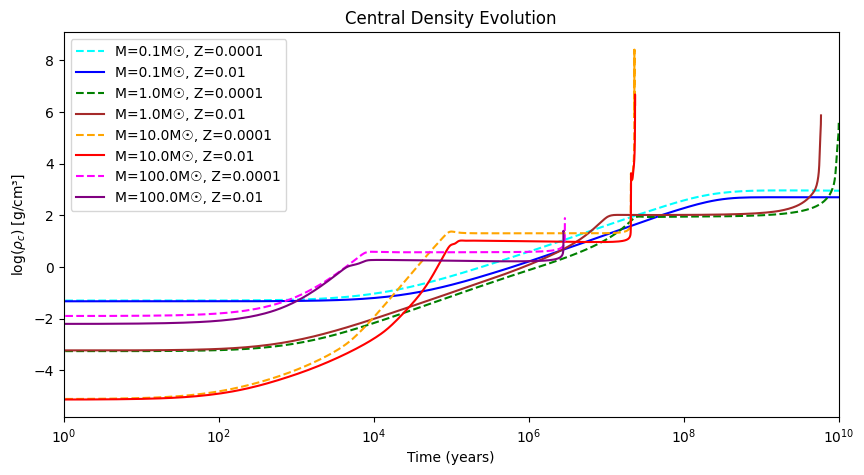

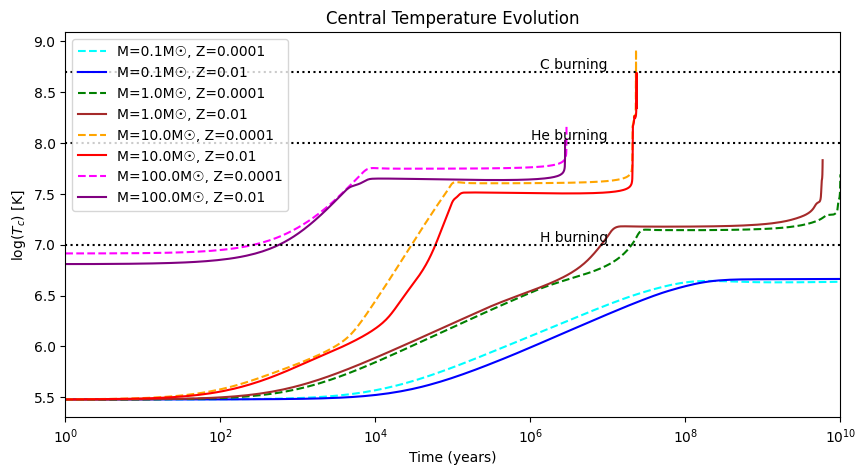

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_web import read_history

def extract_evolution_data(filenames):
    """Extracts central density, central temperature, and star age from history files."""
    evolution_data = []
    
    for filename in filenames:
        model_data = read_history(filename)

        # Extract log-scaled values for stability
        age = model_data['star_age']  # in years
        central_density = model_data.get('log_center_Rho', None)  # log(ρc) in g/cm³
        central_temperature = model_data.get('log_center_T', None)  # log(Tc) in K
        
        evolution_data.append((age, central_density, central_temperature))
    
    return evolution_data

def plot_evolution(evolution_data, metallicities, masses):
    """Plots the evolution of central density and temperature over time."""

    # Colors and linestyles
    models = [
        ("0.1", "0.0001", "cyan", "dashed"),
        ("0.1", "0.01", "blue", "solid"),
        ("1.0", "0.0001", "green", "dashed"),
        ("1.0", "0.01", "brown", "solid"),
        ("10.0", "0.0001", "orange", "dashed"),
        ("10.0", "0.01", "red", "solid"),
        ("100.0", "0.0001", "magenta", "dashed"),
        ("100.0", "0.01", "purple", "solid")
    ]

    # Plot Central Density
    plt.figure(figsize=(10, 5))
    for (age, rho_c, _), (mass, metallicity, color, linestyle) in zip(evolution_data, models):
        plt.plot(age, rho_c, label=f"M={mass}M☉, Z={metallicity}", color=color, linestyle=linestyle)
    
    plt.xscale('log')
    plt.xlabel("Time (years)")
    plt.xlim(1e0, 1e10)
    plt.ylabel("log($\\rho_c$) [g/cm³]")
    plt.title("Central Density Evolution")
    plt.legend()

    # Plot Central Temperature
    plt.figure(figsize=(10, 5))
    for (age, _, temp_c), (mass, metallicity, color, linestyle) in zip(evolution_data, models):
        plt.plot(age, temp_c, label=f"M={mass}M☉, Z={metallicity}", color=color, linestyle=linestyle)

    # Mark important burning phases
    for t in [7, 8, np.log10(5e8)]:
        plt.axhline(y=t, color="black", linestyle="dotted")
        # Text annotation for H, He and C burning
        if t == 7:
            plt.text(1e7, t, "H burning", fontsize=10, verticalalignment='bottom', horizontalalignment='right')
        elif t == 8:
            plt.text(1e7, t, "He burning", fontsize=10, verticalalignment='bottom', horizontalalignment='right')
        elif t == np.log10(5e8):
            plt.text(1e7, t, "C burning", fontsize=10, verticalalignment='bottom', horizontalalignment='right')

    plt.xscale('log')
    plt.xlabel("Time (years)")
    plt.xlim(1e0, 1e10)
    plt.ylabel("log($T_c$) [K]")
    plt.title("Central Temperature Evolution")
    plt.legend()
    plt.show()

# Define file paths
filenames = [
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data", 
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 2",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 3",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 5",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 7",
    "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
]

# Corresponding metallicities and masses
masses = [0.1, 0.1, 1.0, 1.0, 10.0, 10.0, 100.0, 100.0]
metallicities = [0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01, 0.0001, 0.01]

# Extract data and plot
evolution_data = extract_evolution_data(filenames)
plot_evolution(evolution_data, metallicities, masses)


4. (5 points) Plot the time evolution of the surface luminosity, and the nuclear luminosities from pp, CNO, and triple-α burning for the 1 M⊙ and Z = 0.01 model. Use the star age interval 10^0− 10^11 years on a log10 scale. Repeat for the M = 10 M⊙ and M = 100 M⊙ models (Z = 0.01). Do the nuclear luminosities add up to the surface luminosity? Explain why?

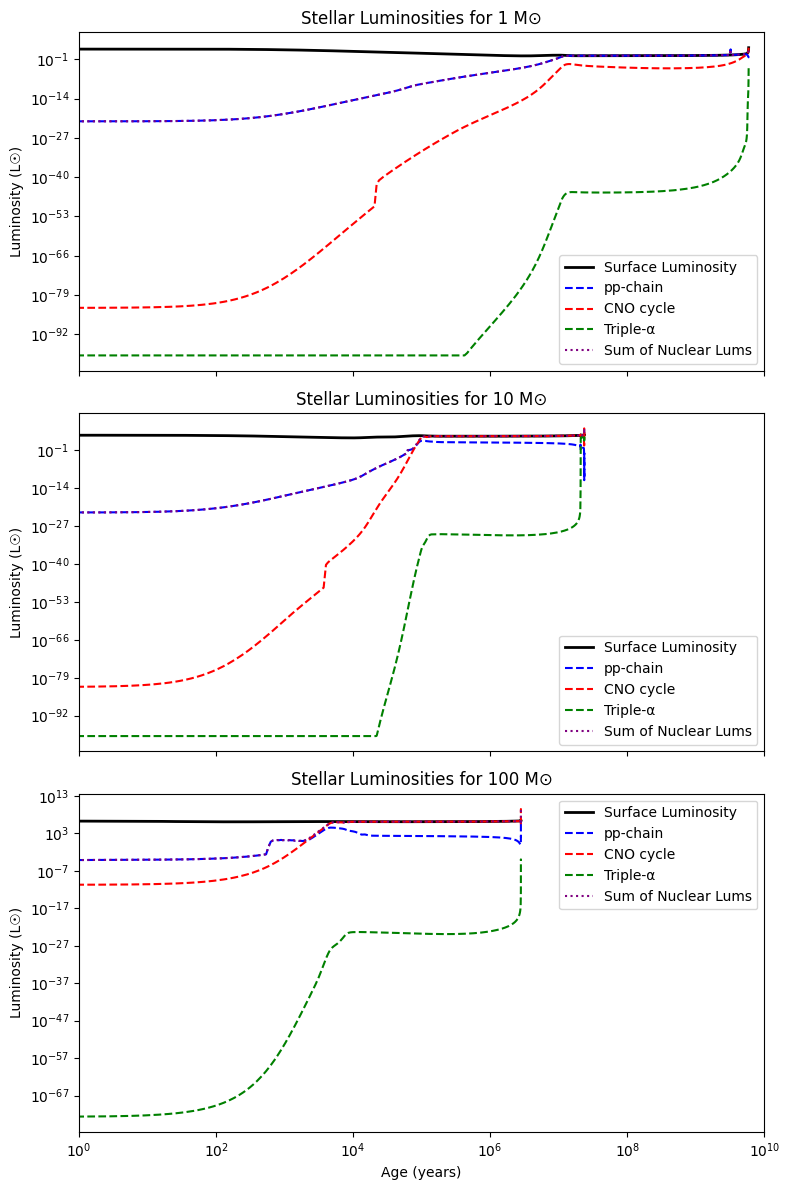

Mismatch for 1 M⊙
Mismatch for 10 M⊙
Mismatch for 100 M⊙


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mesa_web import read_history

# Function to extract relevant columns from the MESA history file
def extract_mesa_data(filename):
    data = read_history(filename)
    return {
        "star_age": data["star_age"],  # Star age in years
        "log_L": data["log_L"],  # Log of total luminosity (L_sun)
        "pp": data["pp"],  # pp-chain luminosity (L_sun)
        "cno": data["cno"],  # CNO-cycle luminosity (L_sun)
        "tri_alfa": data["tri_alfa"],  # Triple-alpha burning luminosity (L_sun)
    }

# Paths to the trimmed history files for M = 1, 10, and 100 M_sun (Z = 0.01)
files = {
    "1 M⊙": "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 4",
    "10 M⊙": "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 6",
    "100 M⊙": "/Users/kritika/Library/CloudStorage/OneDrive-AustralianNationalUniversity/Semester II/ASTR6007 Stars/trimmed_history.data 8"
}

# Extract data
mesa_data = {mass: extract_mesa_data(file) for mass, file in files.items()}

# Plot settings
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

for ax, (mass, data) in zip(axes, mesa_data.items()):
    age = data["star_age"]
    total_luminosity = 10**data["log_L"]  # Convert log(L) to L
    nuclear_luminosity = 10**data["pp"] + 10**data["cno"] + 10**data["tri_alfa"]

    # Plot surface luminosity and nuclear contributions
    ax.plot(age, total_luminosity, label="Surface Luminosity", color="black", linewidth=2)
    ax.plot(age, 10**data["pp"], label="pp-chain", linestyle="dashed", color="blue")
    ax.plot(age, 10**data["cno"], label="CNO cycle", linestyle="dashed", color="red")
    ax.plot(age, 10**data["tri_alfa"], label="Triple-α", linestyle="dashed", color="green")
    ax.plot(age, nuclear_luminosity, label="Sum of Nuclear Lums", linestyle="dotted", color="purple")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlim(1e0, 1e10)
    ax.set_ylabel("Luminosity (L☉)")
    ax.set_title(f"Stellar Luminosities for {mass}")
    ax.legend()

axes[-1].set_xlabel("Age (years)")
plt.tight_layout()
plt.show()

# Check whether the sum of nuclear luminosities matches the total surface luminosity
for mass, data in mesa_data.items():
    total_luminosity = 10**data["log_L"]
    nuclear_luminosity = 10**data["pp"] + 10**data["cno"] + 10**data["tri_alfa"]

    # Use a relative tolerance for comparison
    if not np.allclose(total_luminosity, nuclear_luminosity, rtol=1e-2, atol=1e-5):
        print(f"Mismatch for {mass}")
    else:
        print(f"{mass}: Total Luminosity matches Nuclear Luminosity")
